<a href="https://colab.research.google.com/github/AdrianoGalutti/DSA/blob/main/Projeto_03_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

## A. Entendimento do problema

## 1 - Previsão de Churn

O conceito de Churn em poucas palavras e simplificando o entendimento é uma métrica que indica o número de clientes que cancelaram o contrato ou pararam de comprar seu produto em um determinado período de tempo. Por exemplo, clientes que cancelaram o contrato de serviço ou após o vencimento do mesmo, não renovaram, são clientes considerados em churn.

Churn é um indicativo de gestão da empresa e controlá-lo se faz necessario para evitar problemas futuros.

Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.

## 2 - Definição Problema de Negócio

A ALÔ é uma grande empresa de serviços de telecom. Ela atua principalmente nos países da Europa oferecendo diversos serviços, entre os principais internet e telefone.

O modelo de negócio da empresa é do tipo serviço, ou seja, ela comercializa serviços de telecom para seus clientes através de agências físicas e um portal online. 

Nos últimos meses, o time de Analytics analisando o histórico dos clientes dos últimos anos, percebeu que a empresa está com uma taxa de Churn de mais de 26% dos clientes cancelando os serviços. Isso representa uma perda de milhões para a empresa.

Preocupados com a queda dessa métrica, o time de Analytics da ALÔ, contratou você como consultor de Data Science para criar um plano de ação, com o objetivo de reduzir a evasão de clientes, ou seja, impedir que o cliente cancele seu contrato. Essa evasão, nas métricas de negócio, é conhecida como Churn.


## 3 - Planejamento da Solução

Como vamos entregar as resposta das perguntas de négocio?

- 1. Vamos escrever um e-mail?


- 2. Vamos mandar uma planilha?


- 3. Vamos enviar um gráfico ou mapa dentro de alguma ferramenta?


- 4. Vamos enviar um algoritmo de Machine Learning?

## 4 - Solução escolhida

**Vamos enviar um algoritmo de Machine Learning**

Olá CEO, espero que esse e-mail o encontre bem?

Meu nome é Adriano, sou Cientista de Dados do time de Analytics.

Segue abaixo o link do algoritmo e as considerações de cada hipoteses...

## 5 - Aquisição dos dados

O conjunto de dados que representam o contexto está disponível na plataforma do Github.

Esse é o link: https://github.com/Ninjalemur/telecom_users

Esse conjunto de dados contém 5986 observações e 20 atributos.

## 5 - Premissas de Negócios

- Os dados faltantes foram removidos passando a ter este conjunto de dados 5974 observações.


- Há a presença de outliers (pontos discrepantes), porem não será aplicado o tratamento.


- Os dados estão desbalanceados, e não aplicaremos o balanceamento.

## 6 - Lista de atributos

- **IDCliente**
- **Genero**
- **Aposenta**
- **Casado**
- **Dependentes**
- **MesesComoCliente**
- **ServicoTelefone**
- **MultiplasLinhas**
- **ServicoInternet**
- **ServicoSegurancaOnline**
- **ServicoBackupOnline**
- **ProtecaoEquipamento**
- **ServicoSuporteTecnico**
- **ServicoStreamingTV**
- **ServicoFilmes**
- **TipoContrato**
- **FaturaDigital**
- **FormaPagamento**
- **ValorMensal**
- **TotalGasto**
- **Churn**
- **Codigo**

## 7 - Estratégia de solução

O método utilizado para o projeto foi o CRISP-DM, aplicado conforme os passos abaixo:

**A** . Entendimento do problema.

**B** . Obtenção dos dados.

**C** . Análise Exploratória e Visualização dos dados.

**D** . Pré-processamento. 

**E** . Modelos de Machine Learning.

**F** . Avaliação do modelo. 

## B. Obtenção dos dados

## 01 - Importando as bibliotecas

In [ ]:
import inflection
import pandas            as pd 
import plotly.express    as px 
import numpy             as np 
import seaborn           as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import classification_report,confusion_matrix
from sklearn.ensemble        import RandomForestClassifier
from sklearn.preprocessing   import RobustScaler, MinMaxScaler, LabelEncoder
from tabulate                import tabulate
from numpy                   import loadtxt
from xgboost                 import XGBClassifier
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost                 import plot_importance

## 02 - Carregamento dos Dados

In [ ]:
# Carregar da base de dados
dados_df = pd.read_csv( '../Churn/telecom_users.csv', low_memory=False )

## 03 - Descrição dos Dados

In [ ]:
#Verificar os primeiros registros 
dados_df.head()

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN


In [ ]:
#excluindo as colunas
dados_df.drop(['Unnamed: 0','Codigo'], axis=1, inplace=True)

In [ ]:
#renomeando as colunas
cols_old = ['IDCliente','Genero', 'Aposentado', 'Casado', 'Dependentes',
       'MesesComoCliente', 'ServicoTelefone', 'MultiplasLinhas',
       'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline',
       'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV',
       'ServicoFilmes', 'TipoContrato', 'FaturaDigital', 'FormaPagamento',
       'ValorMensal', 'TotalGasto', 'Churn']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# renomear
dados_df.columns = cols_new

In [ ]:
# redefinir o índice
dados_df = dados_df.set_index('id_cliente') 

In [ ]:
#verificar as dimensões do conjunto de dados
print( 'Numero de linhas: {}'.format( dados_df.shape[0] ) )
print( 'Numero de colunas: {}'.format( dados_df.shape[1] ) )

Numero de linhas: 5986
Numero de colunas: 20


In [ ]:
#verificar os tipos das variáveis
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   genero                    5986 non-null   object 
 1   aposentado                5986 non-null   int64  
 2   casado                    5986 non-null   object 
 3   dependentes               5985 non-null   object 
 4   meses_como_cliente        5986 non-null   int64  
 5   servico_telefone          5986 non-null   object 
 6   multiplas_linhas          5986 non-null   object 
 7   servico_internet          5986 non-null   object 
 8   servico_seguranca_online  5986 non-null   object 
 9   servico_backup_online     5986 non-null   object 
 10  protecao_equipamento      5986 non-null   object 
 11  servico_suporte_tecnico   5986 non-null   object 
 12  servico_streaming_tv      5986 non-null   object 
 13  servico_filmes            5986 non-null   object 
 14

In [ ]:
#corrigindo o tipo de informação
dados_df['aposentado'] = dados_df['aposentado'].replace([0,1],['Nao','Sim'])
dados_df['total_gasto'] = pd.to_numeric(dados_df['total_gasto'], errors='coerce') #corrigindo o tipo de informação

In [ ]:
#verificar os valores faltantes
dados_df.isna().sum()

genero                       0
aposentado                   0
casado                       0
dependentes                  1
meses_como_cliente           0
servico_telefone             0
multiplas_linhas             0
servico_internet             0
servico_seguranca_online     0
servico_backup_online        0
protecao_equipamento         0
servico_suporte_tecnico      0
servico_streaming_tv         0
servico_filmes               0
tipo_contrato                0
fatura_digital               0
forma_pagamento              0
valor_mensal                 0
total_gasto                 10
churn                        1
dtype: int64

In [ ]:
#excluindo as colunas com valor vazio
dados_df = dados_df.dropna(how='all', axis=1) 

In [ ]:
#excluindo as linhas com valor vazio
dados_df = dados_df.dropna(how='any', axis=0) 

In [ ]:
#verificando as dimensões do conjunto de dados
dados_df.shape

(5974, 20)

In [ ]:
# verificar valores duplicados
dados_df.duplicated().sum()

16

In [ ]:
#excluir as colunas com valor vazio
dados_df = dados_df.dropna(how='all', axis=1) 

## 04 - Criação das Hipoteses

* ## Hipoteses 

**1.**   A taxa de evasão do sexo masculino em relação ao sexo feminino é maior.

**2.**   A taxa de evasão de clientes aposentados é maior.

**3.**   A taxa de evasão de clientes casado é maior.

**4.**   A taxa de evasão de clientes que tem dependentes é maior.

**5.**   A taxa de evasão de clientes que tem serviço de telefone é maior.

**6.**   A taxa de evasão de clientes com multiplas linhas é maior.

**7.**   A taxa de evasão de clientes que utilizam fibra ótica é menor.

**8.**   A taxa de evasão de clientes que utilizam serviço segurança online é maior.

**9.**   A taxa de evasão de clientes que utilizam serviço de backup online é maior.

**10.** A taxa de evasão de clientes que utilizam a proteção de equipamento é maior.

**11.** A taxa de evasão de clientes que utilizam serviço de suporte técnico é maior.

**12.** A taxa de evasão de clientes que utilizam serviço streaming é maior.

**13.** A taxa de evasão de clientes que utilizam serviço de filme é maior.

**14.** A taxa de evasão de clientes com tipo de contrato anual é maior.

**15.** A taxa de evasão de clientes com fatura digital é maior.

**16.** A taxa de evasão de clientes por débito automático é maior. 

**17.** A taxa de evasão de clientes nos primeiros 3 meses é maior.

**18.** A taxa de evasão de clientes que cancelaram possui um valor mensal maior.

**19.** A taxa de evasão de clientes que cancelaram possui um total de gasto maior.

##  C. Análise Exploratória e Visualização dos dados

## 05 - Análise Exploratória dos Dados

In [ ]:
#criar cópia
df4 = dados_df.copy()

In [ ]:
num_attributes = df4.select_dtypes( include=['float64', 'int64'] )
cat_attributes = df4.select_dtypes( exclude=['float64', 'int64'] )

In [ ]:
Ct1 = df4.describe().T
Ct1

,count,mean,std,min,25%,50%,75%,max
meses_como_cliente,5974.0,32.510880,24.495864,1.00,9.0000,29.000,56.00,72.00
valor_mensal,5974.0,64.849933,30.107238,18.25,35.7500,70.425,89.90,118.75
total_gasto,5974.0,2297.565777,2274.021491,18.80,404.2375,1411.775,3846.65,8684.80


In [ ]:
# Tendencia Central - media, mediana 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersão - std, min, max, amplitude, skew, curtosi
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,meses_como_cliente,1.00,72.00,71.0,32.510880,29.000,24.493814,0.232511,-1.386606
1,valor_mensal,18.25,118.75,100.5,64.849933,70.425,30.104718,-0.220769,-1.257858
2,total_gasto,18.80,8684.80,8666.0,2297.565777,1411.775,2273.831156,0.950017,-0.263141


In [ ]:
#verificar as variaveis categorigas
cat_attributes.apply( lambda x: x.unique().shape[0] )

genero                      2
aposentado                  2
casado                      2
dependentes                 2
servico_telefone            2
multiplas_linhas            3
servico_internet            3
servico_seguranca_online    3
servico_backup_online       3
protecao_equipamento        3
servico_suporte_tecnico     3
servico_streaming_tv        3
servico_filmes              3
tipo_contrato               3
fatura_digital              2
forma_pagamento             4
churn                       2
dtype: int64

Nao    4387
Sim    1587
Name: churn, dtype: int64

Nao    73.43%
Sim    26.57%
Name: churn, dtype: object

C:\Users\adria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

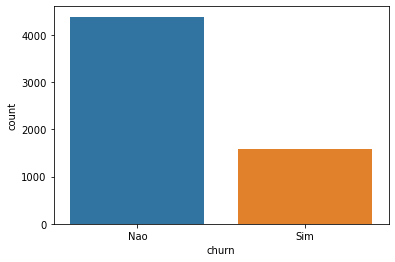

In [ ]:
#monstrando a porcentagem de Churn
display(df4['churn'].value_counts())
display(df4['churn'].value_counts(normalize=True).map('{:.2%}'.format)) #monstrando a porcentagem de Churn
df4['churn'].value_counts()
sns.countplot(df4['churn'])

* ### Variável Numérica

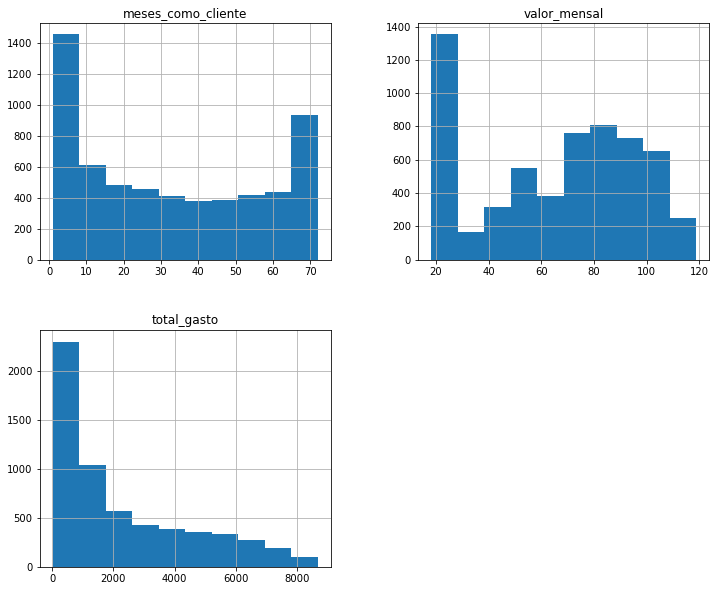

In [ ]:
num_attributes.hist(figsize=(12,10));

O histograma da variável meses como cliente, mostra uma inflação de clientes nos 10 primeiros meses de 65 a 72 meses. 
Já, o histograma da variável valor mensal, mostra uma inflação de clientes que pagam um valor mensal de 18 a 30 reais.
A distribuição da variável total gasto mostra uma assimetria a direita, indicando que os clientes tem uma inflação de gastos em torno de 1000 reais.

In [ ]:
x_cont=['meses_como_cliente', 'valor_mensal','total_gasto']

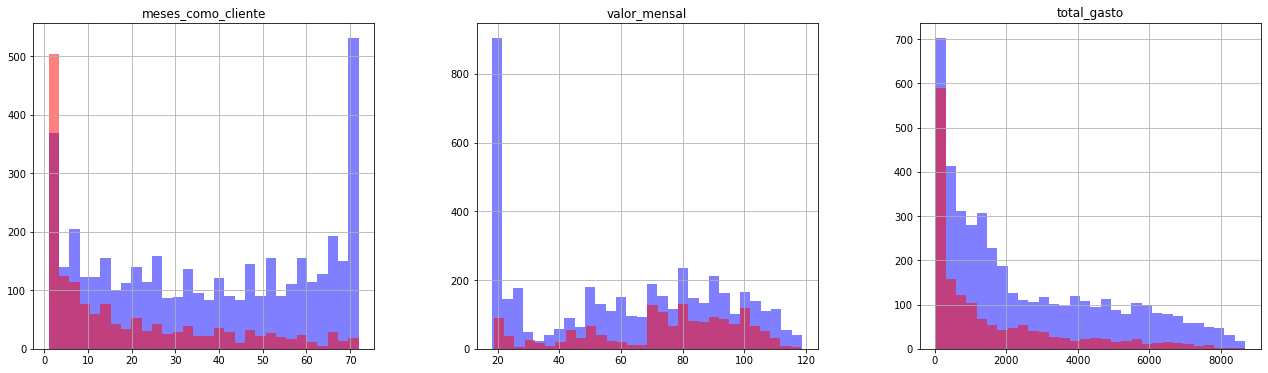

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6));
df4[df4.churn == "Nao"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df4[df4.churn == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

In [ ]:
# substituindo a informação de clientes que sairam 'Churn' de string para numérico
df4['churn'] = df4['churn'].replace(['Sim','Nao'],[1,0])

* ### Variáveis Categóricas

In [ ]:
#definição da paleta de cores
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

### **H1.** A taxa de evasão do sexo masculino em relação ao sexo feminino é maior.

**FALSA** Podemos observar que a taxa de evasão de clientes em diferentes sexo são iguais.

In [ ]:
df_plot = df4.groupby ('genero'). churn.mean (). reset_index () 
df_plot

,genero,churn
0,Feminino,0.269874
1,Masculino,0.261584


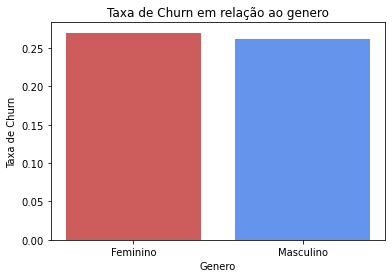

In [ ]:
x =df_plot['genero']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao genero');
plt.xlabel('Genero');
plt.ylabel('Taxa de Churn');

### **H2.** A taxa de evasão de clientes aposentados é maior.
**VERDADEIRA** Podemos observar que a evasão de clientes é maior em pessoas aposentadas.

In [ ]:
df4['aposentado'] = df4['aposentado'].replace([0,1],['Nao','Sim'])

In [ ]:
df_plot = df4.groupby ('aposentado'). churn.mean (). reset_index () 
df_plot

,aposentado,churn
0,Nao,0.236621
1,Sim,0.416149


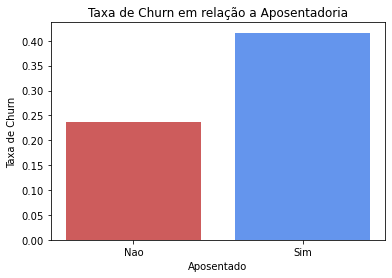

In [ ]:
x =df_plot['aposentado']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Aposentadoria');
plt.xlabel('Aposentado');
plt.ylabel('Taxa de Churn');

### **H3.** A taxa de evasão de clientes casado é maior.
**FALSA** Podemos observar que a taxa de evasão de clientes solteiro é maior.

In [ ]:
df_plot = df4.groupby ('casado'). churn.mean (). reset_index () 
df_plot

,casado,churn
0,Nao,0.328247
1,Sim,0.199032


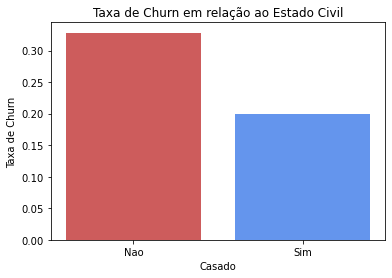

In [ ]:
x =df_plot['casado']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Estado Civil');
plt.xlabel('Casado');
plt.ylabel('Taxa de Churn');

### **H4.** A taxa de evasão de clientes que tem dependentes é maior.
**FALSA** Podemos observar que a taxa evasão de clientes que não tem dependentes é duas vezes maior em relação aos clientes que tem dependentes.

In [ ]:
df_plot = df4.groupby ('dependentes'). churn.mean (). reset_index () 
df_plot

,dependentes,churn
0,Nao,0.311397
1,Sim,0.157865


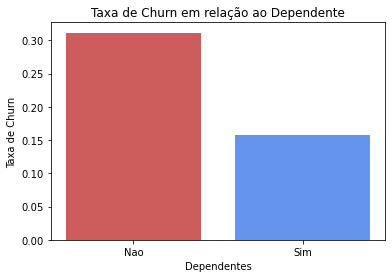

In [ ]:
x =df_plot['dependentes']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Dependente');
plt.xlabel('Dependentes');
plt.ylabel('Taxa de Churn');

### **H5.** A taxa de evasão de clientes que tem serviço de telefone é maior.
**VERDADEIRA** Podemos observar que a taxa de evasão de clientes que optam em ter serviço de telefone é maior.### **H5.** A taxa de evasão de clientes que tem serviço de telefone é maior.

In [ ]:
df_plot = df4.groupby ('servico_telefone'). churn.mean (). reset_index () 
df_plot

,servico_telefone,churn
0,Nao,0.253401
1,Sim,0.266988


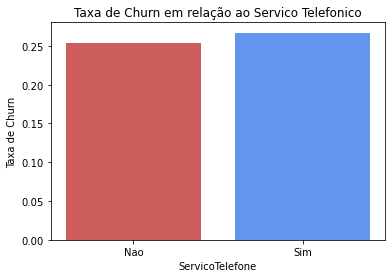

In [ ]:
x =df_plot['servico_telefone']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Telefonico');
plt.xlabel('ServicoTelefone');
plt.ylabel('Taxa de Churn');

### **H6.** A taxa de evasão de clientes com multiplas linhas é maior.
**VERDADEIRA** Podemos observar que a taxa de evasão de clientes com multiplas linhas é em torno de 3% maior.

In [ ]:
df_plot = df4.groupby ('multiplas_linhas'). churn.mean (). reset_index () 
df_plot

,multiplas_linhas,churn
0,Nao,0.251583
1,SemTelefone,0.253401
2,Sim,0.284198


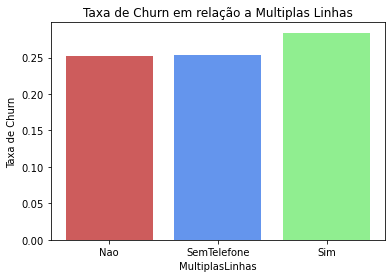

In [ ]:
x =df_plot['multiplas_linhas']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Multiplas Linhas');
plt.xlabel('MultiplasLinhas');
plt.ylabel('Taxa de Churn');

### **H7.** A taxa de evasão de clientes que utilizam fibra ótica é menor.
**FALSA** Clientes que utilizam fibra ótica tem taxa de cancelamento é maior do que os outros serviços.

In [ ]:
df_plot = df4.groupby ('servico_internet'). churn.mean (). reset_index () 
df_plot

,servico_internet,churn
0,DSL,0.192438
1,Fibra,0.415303
2,Nao,0.077103


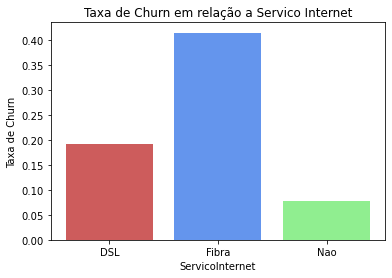

In [ ]:
x =df_plot['servico_internet']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Servico Internet');
plt.xlabel('ServicoInternet');
plt.ylabel('Taxa de Churn');

### **H8.** A taxa de evasão de clientes que utilizam serviço segurança online é maior.
**FALSA** A taxa de evasão de clientes que não utilizam serviço segurança online é maior em relação aos que fazem uso do serviço.

In [ ]:
df_plot = df4.groupby ('servico_seguranca_online'). churn.mean (). reset_index () 
df_plot

,servico_seguranca_online,churn
0,Nao,0.416499
1,SemInternet,0.077103
2,Sim,0.144028


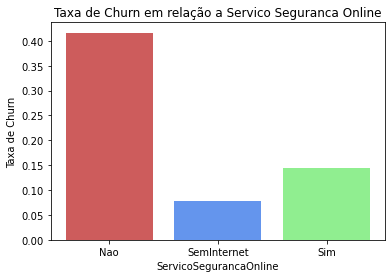

In [ ]:
x =df_plot['servico_seguranca_online']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Servico Seguranca Online');
plt.xlabel('ServicoSegurancaOnline');
plt.ylabel('Taxa de Churn');

### **H9.** A taxa de evasão de clientes que utilizam serviço de backup online é maior.
**FALSA** Podemos observar que a taxa de evasão de clientes que não utilizam serviço backup online é maior em relação aos que fazem uso do serviço.

In [ ]:
df_plot = df4.groupby ('servico_backup_online'). churn.mean (). reset_index () 
df_plot

,servico_backup_online,churn
0,Nao,0.398618
1,SemInternet,0.077103
2,Sim,0.215724


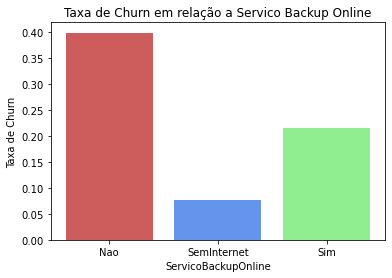

In [ ]:
x =df_plot['servico_backup_online']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Servico Backup Online');
plt.xlabel('ServicoBackupOnline');
plt.ylabel('Taxa de Churn');

### **H10.** A taxa de evasão de clientes que utilizam a proteção de equipamento é maior.
**FALSA** Podemos observar que a a taxa de evasão de clientes que não utilizam-se da proteção equipamento é maior em relação aos que utilizam.

In [ ]:
df_plot = df4.groupby ('protecao_equipamento'). churn.mean (). reset_index () 
df_plot

,protecao_equipamento,churn
0,Nao,0.390678
1,SemInternet,0.077103
2,Sim,0.222818


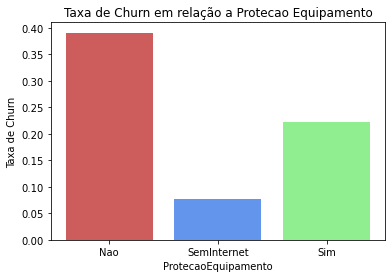

In [ ]:
x =df_plot['protecao_equipamento']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Protecao Equipamento');
plt.xlabel('ProtecaoEquipamento');
plt.ylabel('Taxa de Churn');

### **H11.** A taxa de evasão de clientes que utilizam serviço de suporte técnico é maior.
**FALSA** Podemos observar que a taxa de evasão de clientes é maior em pessoas que nao fazem uso do serviço suporte técnico.

In [ ]:
df_plot = df4.groupby ('servico_suporte_tecnico'). churn.mean (). reset_index () 
df_plot

,servico_suporte_tecnico,churn
0,Nao,0.412977
1,SemInternet,0.077103
2,Sim,0.153668


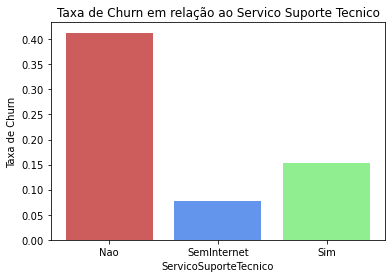

In [ ]:
x =df_plot['servico_suporte_tecnico']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Suporte Tecnico');
plt.xlabel('ServicoSuporteTecnico');
plt.ylabel('Taxa de Churn');

### **H12.** A taxa de evasão de clientes que utilizam serviço streaming é maior.
**FALSA** Podemos observar que a taxa de evasão de clientes que nao utilizam o serviço streaming TV é 4% maior em relação a que utilizam.

In [ ]:
df_plot = df4.groupby ('servico_streaming_tv'). churn.mean (). reset_index () 
df_plot

,servico_streaming_tv,churn
0,Nao,0.334590
1,SemInternet,0.077103
2,Sim,0.299305


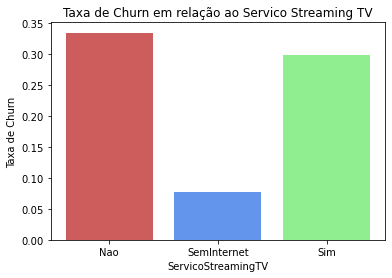

In [ ]:
x =df_plot['servico_streaming_tv']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Streaming TV');
plt.xlabel('ServicoStreamingTV');
plt.ylabel('Taxa de Churn');

### **H13.** A taxa de evasão de clientes que utilizam serviço de filme é maior.
**FALSA** Podemos observar que a evasão de clientes que não utilizam o serviço de filme é de 3% maior das que fazem uso do serviço de filmes.

In [ ]:
df_plot = df4.groupby ('servico_filmes'). churn.mean (). reset_index () 
df_plot

,servico_filmes,churn
0,Nao,0.336592
1,SemInternet,0.077103
2,Sim,0.297818


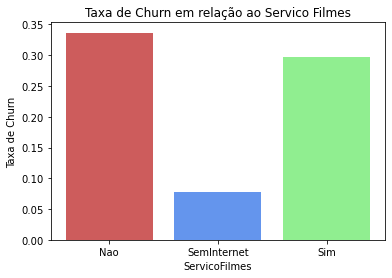

In [ ]:
x =df_plot['servico_filmes']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Servico Filmes');
plt.xlabel('ServicoFilmes');
plt.ylabel('Taxa de Churn');

### **H14.** A taxa de evasão de clientes com tipo de contrato anual é maior.
**FALSA** Podemos observar que a evasão de clientes que fazem uso pelo tipo de contrato mensal é maior em relação aos demais tipos.

In [ ]:
df_plot = df4.groupby ('tipo_contrato'). churn.mean (). reset_index () 
df_plot

,tipo_contrato,churn
0,2 anos,0.028671
1,Anual,0.116078
2,Mensal,0.427654


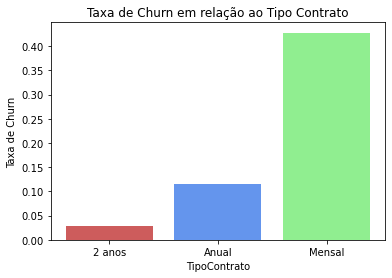

In [ ]:
x =df_plot['tipo_contrato']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Tipo Contrato');
plt.xlabel('TipoContrato');
plt.ylabel('Taxa de Churn');

### **H15.** A taxa de evasão de clientes com fatura digital é maior.
**VERDADEIRA** Observamos que a a taxa de evasão de clientes que utilizam-se fatura digital é duas vezes maior daquelas que não fazem uso.

In [ ]:
df_plot = df4.groupby ('fatura_digital'). churn.mean (). reset_index () 
df_plot

,fatura_digital,churn
0,Nao,0.165647
1,Sim,0.335226


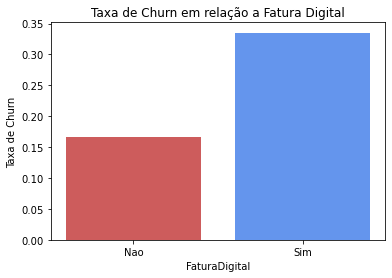

In [ ]:
x =df_plot['fatura_digital']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Fatura Digital');
plt.xlabel('FaturaDigital');
plt.ylabel('Taxa de Churn');

### **H16.** A taxa de evasão de clientes por boleto eletrônico é maior.
**VERDADEIRA** Podemos observar que a taxa de evasão de clientes com boleto eletrônico é maior daqueles que utilizam de outras formas de pagamento.

In [ ]:
df_plot = df4.groupby ('forma_pagamento'). churn.mean (). reset_index () 
df_plot

,forma_pagamento,churn
0,BoletoEletronico,0.449651
1,BoletoImpresso,0.193240
2,CartaoCredito,0.152074
3,DebitoAutomatico,0.171648


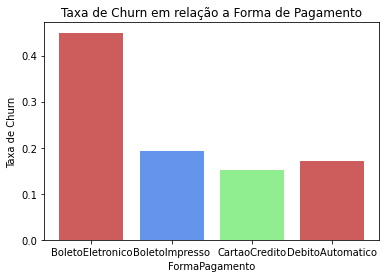

In [ ]:
x =df_plot['forma_pagamento']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Forma de Pagamento');
plt.xlabel('FormaPagamento');
plt.ylabel('Taxa de Churn');

### **H17.** A taxa de evasão de clientes nos primeiros 3 meses é maior.
**VERDADEIRA** Podemos observar que a taxa de evasão de clientes nos primeiros 3 meses é maior.

In [ ]:
df_plot = df4.groupby ('meses_como_cliente'). churn.mean (). reset_index () 
df_plot.sort_values(by='churn', ascending = False)

,meses_como_cliente,churn
0,1,0.623529
1,2,0.536082
2,3,0.485207
3,4,0.474026
4,5,0.468468
...,...,...
61,62,0.075758
63,64,0.042254
70,71,0.032895
62,63,0.032258


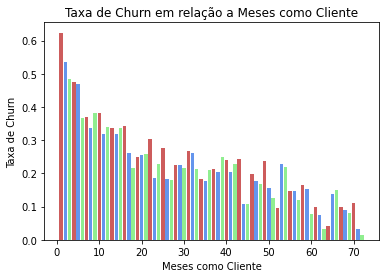

In [ ]:
x =df_plot['meses_como_cliente']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Meses como Cliente');
plt.xlabel('Meses como Cliente');
plt.ylabel('Taxa de Churn');

churn
0    37.671074
1    18.246377
Name: meses_como_cliente, dtype: float64

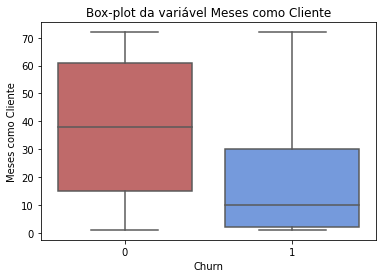

In [ ]:
#box-plot meses como cliente em relação ao Churn
sns.boxplot(x="churn", y="meses_como_cliente",data=df4,palette=cols); 
plt.title('Box-plot da variável Meses como Cliente');
plt.xlabel('Churn');
plt.ylabel('Meses como Cliente');
df4.groupby(['churn'])['meses_como_cliente'].mean()

### **H18.** A taxa de evasão de clientes que cancelaram possui um valor mensal maior.
**VERDADEIRA** Podemos observar que a taxa de evasão de clientes que cancelaram possui um valor mensal maior.

In [ ]:
df_plot = df4.groupby ('valor_mensal'). churn.mean (). reset_index () 
df_plot.sort_values(by='churn', ascending = False)

,valor_mensal,churn
121,28.45,1.0
730,72.85,1.0
751,73.95,1.0
1461,113.20,1.0
130,29.40,1.0
...,...,...
597,64.95,0.0
598,65.00,0.0
599,65.05,0.0
600,65.10,0.0


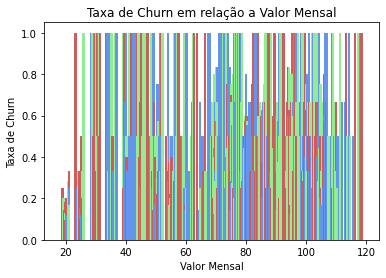

In [ ]:
x =df_plot['valor_mensal']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Valor Mensal');
plt.xlabel('Valor Mensal');
plt.ylabel('Taxa de Churn');

churn
0    61.480248
1    74.164871
Name: valor_mensal, dtype: float64

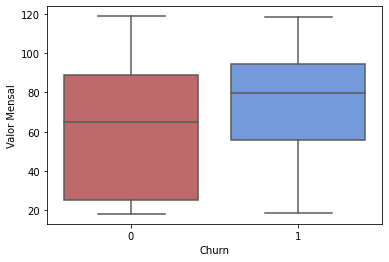

In [ ]:
#box-plot valor mensal em relação ao Churn
sns.boxplot(x="churn", y="valor_mensal", data=df4,palette=cols); 
plt.xlabel('Churn');
plt.ylabel('Valor Mensal');
df4.groupby(['churn'])['valor_mensal'].mean()

### **H19.** A taxa de evasão de clientes que cancelaram possui um total de gasto maior.
**FALSA** Podemos observar que a taxa de evasão de clientes que cancelaram possui um total de gasto menor.

In [ ]:
df_plot = df4.groupby ('total_gasto'). churn.mean (). reset_index () 
df_plot.sort_values(by='churn', ascending = False)

,total_gasto,churn
5607,8684.80,1.0
4570,4867.95,1.0
4548,4820.15,1.0
4550,4822.85,1.0
1760,733.35,1.0
...,...,...
2396,1205.50,0.0
2398,1207.00,0.0
2400,1208.60,0.0
2401,1209.25,0.0


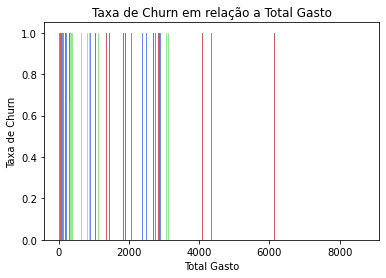

In [ ]:
x =df_plot['total_gasto']
y=df_plot['churn']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a Total Gasto');
plt.xlabel('Total Gasto');
plt.ylabel('Taxa de Churn');

churn
0    2567.744222
1    1550.701985
Name: total_gasto, dtype: float64

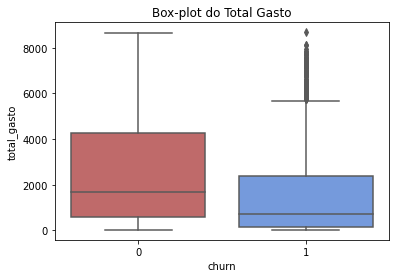

In [ ]:
#box-plot total gasto em relação ao Churn
sns.boxplot(x="churn", y='total_gasto', data=df4,palette=cols);
plt.title('Box-plot do Total Gasto');
plt.xlabel('churn');
plt.ylabel('total_gasto');
df4.groupby(['churn'])['total_gasto'].mean()

* ### Resumo das Hipoteses

In [ ]:
tab =[['Hipoteses', 'Conclusao'],
      ['H1', 'Falsa'],  
      ['H2', 'Verdadeira'],  
      ['H3', 'Falsa'],
      ['H4', 'Falsa'],
      ['H5', 'Verdadeira', '-'],
      ['H6', 'Verdadeira', '-'],
      ['H7', 'Falsa'],
      ['H8', 'Falsa'],
      ['H9', 'Falsa'],
      ['H10', 'Falsa'],
      ['H11', 'Falsa'],
      ['H12', 'Falsa'],
      ['H13', 'Falsa'],
      ['H14', 'Falsa'],
      ['H15', 'Verdadeira'],
      ['H16', 'Verdadeira'],
      ['H17', 'Verdadeira'],
      ['H18', 'Verdadeira'],
      ['H19', 'Falsa'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao
-----------  -----------
H1           Falsa
H2           Verdadeira
H3           Falsa
H4           Falsa
H5           Verdadeira
H6           Verdadeira
H7           Falsa
H8           Falsa
H9           Falsa
H10          Falsa
H11          Falsa
H12          Falsa
H13          Falsa
H14          Falsa
H15          Verdadeira
H16          Verdadeira
H17          Verdadeira
H18          Verdadeira
H19          Falsa


* ### Matriz de Correlação

Utilizaremos a função heatmap() para entender o relacionamento entre as variáveis numéricas.

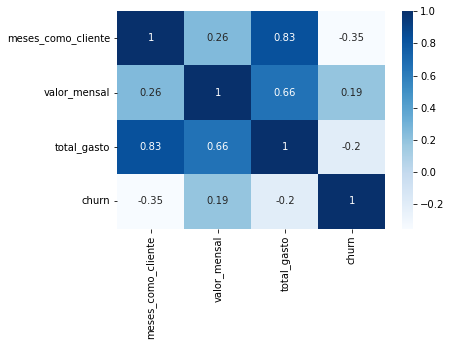

In [ ]:
correlation = df4.corr( method='pearson' )
sns.heatmap( correlation, cmap='Blues', annot=True );

In [ ]:
# Explorando as correlações com a variavel Target 
df4.corr()['churn'].sort_values(ascending=False)

churn                 1.000000
valor_mensal          0.186102
total_gasto          -0.197555
meses_como_cliente   -0.350272
Name: churn, dtype: float64

Analisando a correlação entre as variáveis com a variavel Target, observa-se que temos baixas correlações. A maior correlação é entre as variáveis meses_como_cliente e Churn e temos uma correlação negativa de - 0,35 entre elas. Ou seja, quando menor o meses_como_cliente  maior o Churn.

## D. Pré-Processamento

## 06 - Pré-Processamento

In [ ]:
#criar cópia
df5 = df4.copy()

* ### Normalização

Como nenhuma das variáveis apresenta uma distribuição normal, vamos direto para o Rescaling.

* ### Rescaling

In [ ]:
rs = RobustScaler( unit_variance=False )
nms = MinMaxScaler()

# total_gasto
df5['total_gasto'] = rs.fit_transform( df5[['total_gasto']].values )


# valor_mensal
df5['valor_mensal'] = nms.fit_transform( df5[['valor_mensal']].values )

# meses_como_cliente
df5['meses_como_cliente'] = nms.fit_transform( df5[['meses_como_cliente']].values )

* ### Encoding

In [ ]:
variaveis_cat = ['genero', 'aposentado', 'casado', 'dependentes',
       'servico_telefone', 'multiplas_linhas',
       'servico_internet', 'servico_seguranca_online', 'servico_backup_online',
       'protecao_equipamento', 'servico_suporte_tecnico',
       'servico_streaming_tv', 'servico_filmes', 'tipo_contrato',
       'fatura_digital', 'forma_pagamento']

df5 = pd.get_dummies(df5, columns = variaveis_cat, drop_first = True)

In [ ]:
df5.head()

,meses_como_cliente,valor_mensal,total_gasto,churn,genero_Masculino,aposentado_Sim,casado_Sim,dependentes_Sim,servico_telefone_Sim,multiplas_linhas_SemTelefone,...,servico_streaming_tv_SemInternet,servico_streaming_tv_Sim,servico_filmes_SemInternet,servico_filmes_Sim,tipo_contrato_Anual,tipo_contrato_Mensal,fatura_digital_Sim,forma_pagamento_BoletoImpresso,forma_pagamento_CartaoCredito,forma_pagamento_DebitoAutomatico
id_cliente,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1.000000,0.058209,0.093793,0,1,0,1,1,1,0,...,1,0,1,0,0,0,0,0,1,0
9688-YGXVR,0.605634,0.695522,0.744078,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
9286-DOJGF,0.521127,0.564179,0.423562,1,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
6994-KERXL,0.042254,0.374627,-0.340829,0,1,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2181-UAESM,0.014085,0.350249,-0.375398,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## E. Modelos de Machine Learning 

## 07 - ML_Modelo de Churn

In [ ]:
#Criando variaveis independentes e dependentes
y = df5['churn']
X = df5
X = df5.drop('churn',axis = 1)
X

,meses_como_cliente,valor_mensal,total_gasto,genero_Masculino,aposentado_Sim,casado_Sim,dependentes_Sim,servico_telefone_Sim,multiplas_linhas_SemTelefone,multiplas_linhas_Sim,...,servico_streaming_tv_SemInternet,servico_streaming_tv_Sim,servico_filmes_SemInternet,servico_filmes_Sim,tipo_contrato_Anual,tipo_contrato_Mensal,fatura_digital_Sim,forma_pagamento_BoletoImpresso,forma_pagamento_CartaoCredito,forma_pagamento_DebitoAutomatico
id_cliente,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1.000000,0.058209,0.093793,1,0,1,1,1,0,1,...,1,0,1,0,0,0,0,0,1,0
9688-YGXVR,0.605634,0.695522,0.744078,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
9286-DOJGF,0.521127,0.564179,0.423562,0,1,1,0,1,0,1,...,0,0,0,0,0,1,1,0,0,1
6994-KERXL,0.042254,0.374627,-0.340829,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
2181-UAESM,0.014085,0.350249,-0.375398,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,0.000000,0.763682,-0.382515,1,0,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,0
5982-PSMKW,0.309859,0.724876,0.228481,0,0,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
8044-BGWPI,0.154930,0.028856,-0.321206,1,0,1,1,1,0,0,...,1,0,1,0,0,1,1,0,0,0


In [ ]:
# Separando em dados teste e treinamento 
x_treino, x_teste, y_treino, y_teste  = train_test_split(X, y, test_size = 0.30, random_state = 42)
x_treino

,meses_como_cliente,valor_mensal,total_gasto,genero_Masculino,aposentado_Sim,casado_Sim,dependentes_Sim,servico_telefone_Sim,multiplas_linhas_SemTelefone,multiplas_linhas_Sim,...,servico_streaming_tv_SemInternet,servico_streaming_tv_Sim,servico_filmes_SemInternet,servico_filmes_Sim,tipo_contrato_Anual,tipo_contrato_Mensal,fatura_digital_Sim,forma_pagamento_BoletoImpresso,forma_pagamento_CartaoCredito,forma_pagamento_DebitoAutomatico
id_cliente,,,,,,,,,,,,,,,,,,,,,
3570-YUEKJ,0.577465,0.311443,0.193520,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2150-UWTFY,0.295775,0.426866,0.002985,0,0,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4070-OKWVH,0.718310,0.759701,1.049852,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
9334-GWGOW,0.084507,0.563184,-0.269150,1,1,1,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
9961-JBNMK,0.281690,0.781592,0.179678,1,1,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047-YXDMZ,0.281690,0.017413,-0.288773,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
8647-SDTWQ,0.788732,0.557711,0.757194,1,0,1,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3737-XBQDD,0.323944,0.662687,0.185052,1,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,1


## Modelo KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1116  201  1317
1         213  263   476
All      1329  464  1793


In [ ]:
print(classification_report(y_teste, resultado_knn ))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1317
           1       0.57      0.55      0.56       476

    accuracy                           0.77      1793
   macro avg       0.70      0.70      0.70      1793
weighted avg       0.77      0.77      0.77      1793



### Encontrando o melhor K

Para encontrar o melhor K, ajustaremos varios modelos variando o número de K, aquele modelo que retornar o menor erro de predição é o modelo com K ideal.

In [ ]:
error = []
# Calculando o erro do k entre 1 a 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_treino, y_treino)
    pred_i = knn.predict(x_teste)
    error.append(np.mean(pred_i != y_teste))

Na função acima, ajustei o modelo para diferentes k, variando k de 1 a 40. E depois calculei o número de erros de classificação e tirei a média, erro médio. A seguir, vou plotar os erros de predição para os diferentes k e aquele k com o menor erro, será o ajuste ideal.

Text(0, 0.5, 'Erro Médio')

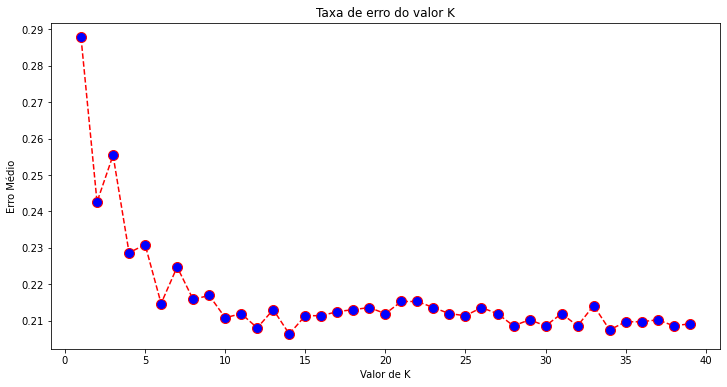

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

O melhor k=14, assim iremos ajustar novamente o modelo KNN considerando K=14.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=14)

### Previsão na amostra teste e matriz de confusão

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1170  147  1317
1         223  253   476
All      1393  400  1793


In [ ]:
print(classification_report(y_teste, resultado_knn ))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1317
           1       0.63      0.53      0.58       476

    accuracy                           0.79      1793
   macro avg       0.74      0.71      0.72      1793
weighted avg       0.78      0.79      0.79      1793



Observe que apesar de estar classificando bem os clientes que não deram Churn, classe 0, temos muitos falsos negativos no modelo (quando o modelo preve 0, mas o correto era 1). Ou seja, o modelo não consegue prever bem o Churn, que é o objetivo principal na análise.

Vamos tentar o modelo Random Forest para buscar um resultado melhor.

## Modelo Random Forest

In [ ]:
# Instancie o modelo com 1000 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 1000, random_state = 42) 
# Treine o modelo nos dados de treinamento 
rf.fit (x_treino, y_treino);

In [ ]:
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1201  116  1317
1         245  231   476
All      1446  347  1793


O modelo de Random Forest conseguiu melhores resultados, porém ainda temos bastante falsos negativos. Vamos tentar um modelo mais robusto e que não sofre tanta influência em amostras desbalanceada.

In [ ]:
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1317
           1       0.67      0.49      0.56       476

    accuracy                           0.80      1793
   macro avg       0.75      0.70      0.72      1793
weighted avg       0.79      0.80      0.79      1793



In [ ]:
#Analisando a importância de cada variável
rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
total_gasto,0.193096
valor_mensal,0.168728
meses_como_cliente,0.162363
tipo_contrato_Mensal,0.069549
servico_internet_Fibra,0.035927
genero_Masculino,0.028940
servico_seguranca_online_Sim,0.025840
fatura_digital_Sim,0.025522
casado_Sim,0.023528
servico_suporte_tecnico_Sim,0.022382


## Modelo XGBoost

In [ ]:
#Importando as bibliotecas necessárias
#from numpy import loadtxt
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)
 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

### Validação do modelo nos dados de teste

In [ ]:
#fazendo as predições no dados de teste
preditos_xgb = xgb.predict(x_teste)
print (pd.crosstab(y_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1156  161  1317
1         259  217   476
All      1415  378  1793


In [ ]:
print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1317
           1       0.57      0.46      0.51       476

    accuracy                           0.77      1793
   macro avg       0.70      0.67      0.68      1793
weighted avg       0.75      0.77      0.76      1793



Usando o XGBoost alcançamos uma acurácia de 77%. O modelo Random Forest teve uma acurácia de 80%, escolhemos o Random Forest  como o melhor modelo. Pois o Random Forest foi o modelo que conseguiu prever melhor o Churn.

Todas as medidas referentes a classe 1 foi melhor no Random Forest. Lembre-se, a acurácia é uma medida geral do acerto do modelo, e o modelo XGBoost não conseguiu prever a classe 0 tão bem quanto o modelo Random Forest, por isso a acurácia foi menor.

Porém como o nosso objetivo era prever o Churn, o modelo Random forest teve uma melhor performance nesse quesito.

### Analisando a importancia das variáveis

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

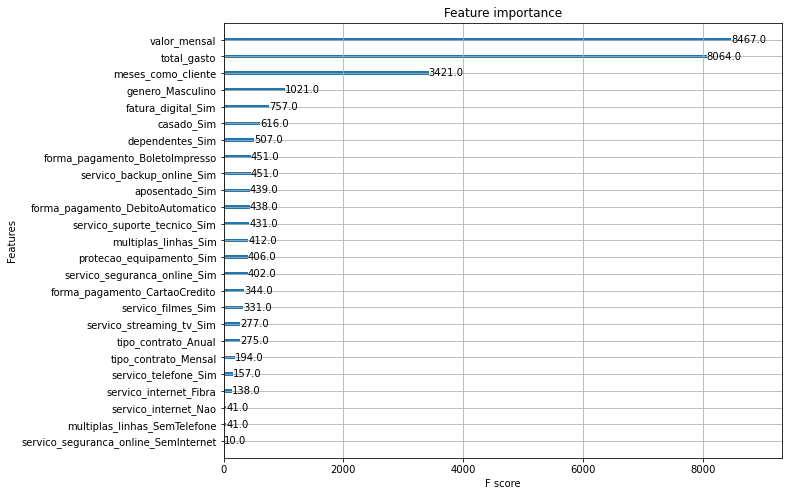

In [ ]:
#Analisando a importância de cada variável
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

As variáveis mais importante para prever o Churn dos clientes foram: valor mensal, total gasto, meses como cliente e genero masculino.

## Método Ensemble

Para tentar melhorar a previsão do Churn, vamos combinar os dois melhores modelos, Random Forest e XGBoost.

In [ ]:
# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('rf', rf),('xgb',xgb)], voting='soft')
voto = voto.fit(x_treino,y_treino)

In [ ]:
y_predito = voto.predict(x_teste)
print (pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0        1171  146  1317
1         261  215   476
All      1432  361  1793


In [ ]:
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1317
           1       0.60      0.45      0.51       476

    accuracy                           0.77      1793
   macro avg       0.71      0.67      0.68      1793
weighted avg       0.76      0.77      0.76      1793



Ao combinar os modelos observamos que não houve uma melhora nas medidas de validação, assim vamos considerar o modelo Random Forest como o nosso melhor modelo.

### Probabilidade de Churn

Finalmente, a melhor maneira de usar esse modelo é atribuir probabilidade de evasão para cada cliente, criar segmentos e criar estratégias sobre isso. Para obter a probabilidade de Churn do nosso modelo, utilize o bloco de código abaixo:

In [ ]:
df5['proba'] = voto.predict_proba(X[x_treino.columns])[:,1]
df5[['proba']].sort_values(by = 'proba', ascending = False)

,proba
id_cliente,
9248-OJYKK,0.998420
3428-XZMAZ,0.997191
6457-GIRWB,0.997191
1820-TQVEV,0.995535
2636-ALXXZ,0.994909
...,...
4609-KNNWG,0.000005
2236-HILPA,0.000005
1998-VHJHK,0.000004


Agora temos a probabilidade do cliente dar Churn e podemos criar ações com base nisso. 

## F. Avaliação do modelo 

## 08 - Considerações

O modelo final, foi a combinação dos modelos XGBoost e Random Forest, porem não houve uma melhora. 

O modelo Random Forest se mostrou eficiente para prever a probabilidade do Churn dos clientes. As variáveis mais importante para prever o Churn foram o valor mensal, total gasto, meses como cliente e genero masculino.

Com modelo de Churn podemos prever clientes com a maior chance de cancelar o serviço e assim tomar medidas preventivas, afim de evitar essa saída.

Podemos melhorar a predição desse modelo tratando os outliers (pontos discrepantes) e balanceando as amostras.